In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = pd.DataFrame(data.target)

In [3]:
x = df.drop(['target'],axis=1)
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=143)

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 100\nvalue = [32, 37, 31]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.5, 0.75, 'X[2] <= 4.85\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]'),
 Text(0.2, 0.5833333333333334, 'X[3] <= 1.7\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(0.7, 0.4166666666666667, 'X[2] <= 5.05\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.25, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.7, 0.0833333333333

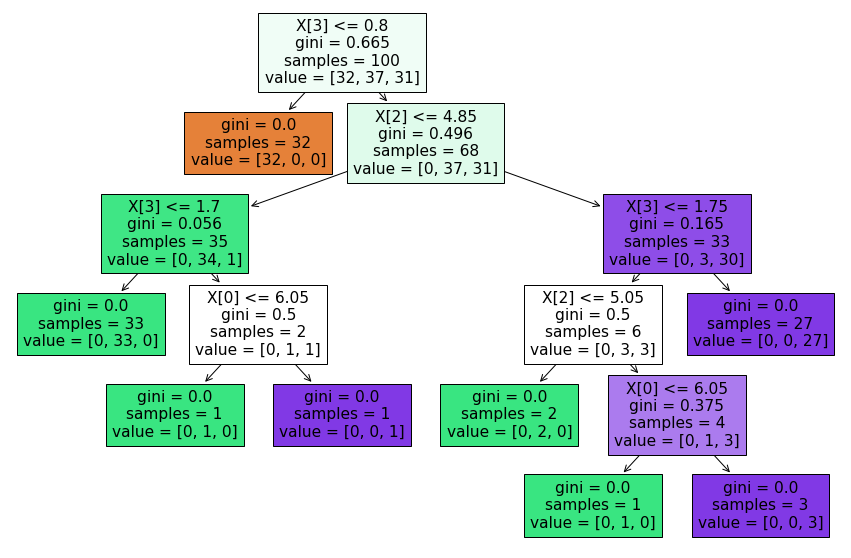

In [6]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
params = {'max_depth':range(1,50),
         'criterion':['gini','entropy'],
         'max_leaf_nodes':range(1,5)}
model = GridSearchCV(classifier,param_grid=params,cv=5,verbose=1)
model.fit(x_train,y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50),
                         'max_leaf_nodes': range(1, 5)},
             verbose=1)

In [8]:
model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4}

In [9]:
model.best_score_

0.95

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[18,  0,  0],
       [ 0, 13,  3],
       [ 0,  0, 16]], dtype=int64)

In [12]:
confusion_matrix(model.predict(x_train),y_train)

array([[32,  0,  0],
       [ 0, 37,  4],
       [ 0,  0, 27]], dtype=int64)

In [13]:
accuracy_score(y_test,y_pred)

0.94

In [14]:
accuracy_score(y_train,model.predict(x_train))

0.96

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
accuracy_score(y_test,lr.predict(x_test))

0.94

In [18]:
accuracy_score(y_train,lr.predict(x_train))

0.96

##### Defining another data

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data1 = pd.DataFrame(data.data,columns=data.feature_names)
data1['Target'] = pd.DataFrame(data.target)

In [20]:
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
data1['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [22]:
x = data1.drop(['Target'],axis=1)
y = data1['Target']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=125)

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.675, 0.9375, 'X[22] <= 114.45\ngini = 0.468\nsamples = 381\nvalue = [142, 239]'),
 Text(0.45, 0.8125, 'X[27] <= 0.136\ngini = 0.173\nsamples = 261\nvalue = [25, 236]'),
 Text(0.25, 0.6875, 'X[3] <= 696.25\ngini = 0.059\nsamples = 229\nvalue = [7, 222]'),
 Text(0.15, 0.5625, 'X[10] <= 0.643\ngini = 0.027\nsamples = 222\nvalue = [3, 219]'),
 Text(0.1, 0.4375, 'X[23] <= 785.75\ngini = 0.018\nsamples = 221\nvalue = [2, 219]'),
 Text(0.05, 0.3125, 'gini = 0.0\nsamples = 203\nvalue = [0, 203]'),
 Text(0.15, 0.3125, 'X[23] <= 790.8\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.1875, 'X[17] <= 0.017\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.15, 0.0625, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.25, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.35, 0.5625, 'X[1] <= 18.975\ngini = 0.49\nsamples = 7\nvalue = [4,

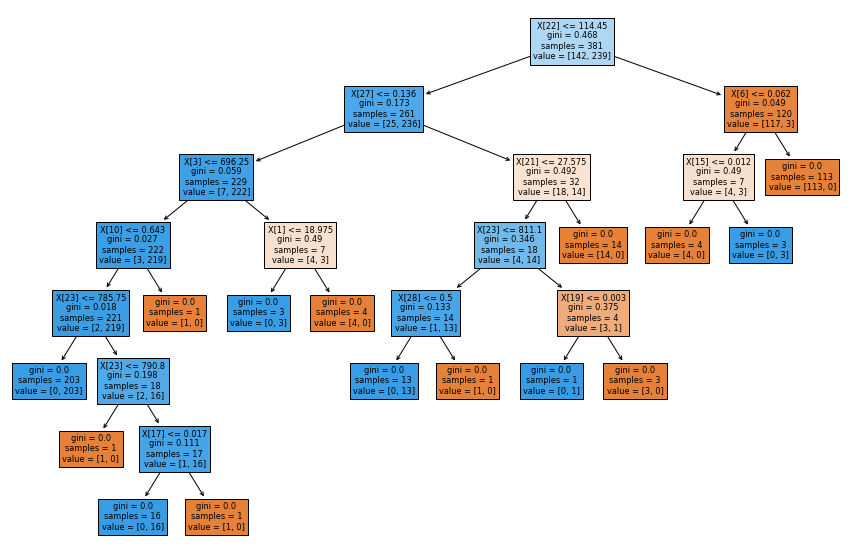

In [25]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=1)

In [26]:
params = {'criterion':['gini','entropy'],
         'max_depth':range(1,10),
         'max_leaf_nodes':range(1,10)}
model = GridSearchCV(dt,param_grid=params,cv=5,verbose=1)
model.fit(x_train,y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(1, 10)},
             verbose=1)

In [27]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 9}

In [28]:
model.best_score_

0.9396787423103212

In [29]:
accuracy_score(y_test,model.predict(x_test))

0.9468085106382979

In [30]:
accuracy_score(y_train,model.predict(x_train))

0.9816272965879265